# Regressão Linear Simples

## Modelando a relação linear entre as colunas (atributos) `Vendas` e `Propaganda` de um `dataset`

### **Observações**

*   Correlação: relacionamento entre variáveis, ou seja, uma variável afeta a outra. Possui duas vias: correlação de `vendas` x `propaganda` = correlação `propaganda` x `vendas`

*   Regressão é uma via: `propaganda` para prever as `vendas` é diferente de utilizar as `vendas` para prever `propaganda`.

* Espera-se que a correlação seja de moderada a forte para obter um bom modelo (i.e. positiva ou negativa)

* Regressão linear: existir lineariedade

## Visão Geral do Projeto

Neste projeto, vamos construir um modelo de regressão linear simples para estudar a relação linear entre o conjunto de dados de vendas e publicidade para um produto dietético para controle de peso.



###  Regressão linear

A regressão linear é uma técnica estatística usada para encontrar a relação linear entre variáveis dependentes e uma ou mais variáveis independentes. Esta técnica é aplicável para problemas de regressão de aprendizagem supervisionada onde tentamos prever uma variável contínua.

A regressão linear pode ser classificada em dois tipos – **regressão linear simples e múltipla**. Neste projeto, vamos utilizar a técnica de **Regressão Linear Simples** onde tenho uma variável independente e uma dependente. É a forma mais simples de Regressão Linear onde ajustamos uma linha reta aos dados.

###  Regressão Linear Simples

A regressão linear simples (ou RLS) é o modelo mais simples em aprendizado de máquina. Ele modela a relação linear entre as variáveis independentes e dependentes.

Neste projeto, existe uma variável independente ou de entrada que representa os dados de Vendas e é denotada por X. Da mesma forma, existe uma variável dependente ou de saída que representa os dados de Publicidade e é denotada por y. Queremos construir uma relação linear entre essas variáveis. Esta relação linear pode ser modelada por uma equação matemática da forma:

$$\hat{y} = mx + b$$

>Na equação acima $x$ e $\hat{y}$ são chamados de variáveis **independente** e **dependente**, respectivamente,
>
> $m$ é o coeficiente da variável independente $x$ (representa a inclinação (_slope_) da reta)
>
> $b$ é o termo constante (representa o valor de interseção com o eixo `y`)
>
> $\hat{y}$ representa o valor de $y$ previsto para um dado valor $x$.            
>
> $m$ e $b$ são chamados de parâmetros do modelo.

Para simplificar, podemos comparar a equação acima com a equação básica da forma:

$$y = ax + b$$     

Nós podemos observar que:

* a inclinação da reta é dada por, $a = m$, e

* a interseção (i.e. interceptação) da reta com o eixo $y$ por $b$.


Neste modelo de Regressão Linear Simples, queremos ajustar uma reta que estime a relação linear entre $X$ e $Y$. Assim, a questão do ajuste se reduz a estimar os parâmetros do modelo $m$ e $b$.

Agora, nossa tarefa é encontrar uma reta que melhor se ajuste a esse gráfico de dispersão. Esta linha nos ajudará a prever o valor de qualquer variável `Target` para qualquer variável `Feature`. Esta linha é chamada de **Linha de Regressão**.





## Bibliotecas Python

Vamos usar neste projeto as seguintes bibliotecas:

* **Numpy** – Fornece uma estrutura de _array_ numérica rápida e alguas funções operacionais.

* **Pandas** – Fornece ferramentas para tarefas de armazenamento, manipulação e análise de dados.

* **Scikit-Learn** – A biblioteca de aprendizado de máquina necessária em Python.

* **Matplotlib** – É a biblioteca básica de plotagem em Python. Ela fornece ferramentas para este fim.


In [1]:
# Importa as bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

# O comando acima define o backend do matplotlib para o backend 'inline'.
# Significa que a saída dos comandos de plotagem é exibida em linha.

## Sobre o conjunto de dados (_dataset_)

O conjunto de dados foi importado do site de econometria com o seguinte URL:

http://www.econometrics.com/intro/sales.htm

Este conjunto de dados contém despesas com vendas e publicidade para um produto dietético para controle de peso. Ele contém dados mensais de 36 meses. As variáveis neste conjunto de dados são `Vendas` e `Publicidade` (`Propaganda`).



In [3]:
# Importa os dados

url = "sales.txt"
df = pd.read_csv(url, sep='\t',header=None)

## Análise Exploratória dos Dados (AED)


Primeiro, importo o conjunto de dados para o dataframe com a função `read_csv()` padrão da biblioteca Pandas e atribuo-o à variável `df`. Em seguida, conduziremos uma AED para ter uma ideia dos dados.

In [4]:
# Análise Exploratória dos Dados

# Ver as dimensões do df
print(df.shape)

(36, 2)


In [5]:
# Veja as 5 principais linhas do df
print(df.head())

      0     1
0  12.0  15.0
1  20.5  16.0
2  21.0  18.0
3  15.5  27.0
4  15.3  21.0


In [6]:
# Renomeia as colunas do dataframe
df.columns = ['Sales', 'Advertising']

In [7]:
# Veja as 5 principais linhas do df com os nomes das colunas renomeados
print(df.head())

   Sales  Advertising
0   12.0         15.0
1   20.5         16.0
2   21.0         18.0
3   15.5         27.0
4   15.3         21.0


In [8]:
# Ver resumo do dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 708.0 bytes
None


In [9]:
# Ver a estatística descritiva
print(df.describe())

           Sales  Advertising
count  36.000000    36.000000
mean   24.255556    28.527778
std     6.185118    18.777625
min    12.000000     1.000000
25%    20.300000    15.750000
50%    24.250000    23.000000
75%    28.600000    41.000000
max    36.500000    65.000000


## Variáveis Independentes e Dependentes

Neste projeto, refiro-me à variável independente como variável `Feature` e à variável dependente como variável `Target`. Essas variáveis também são reconhecidas por nomes diferentes, como segue:

### Variável Independente

A variável independente também é chamada de variável de entrada e é denotada por $X$. Em aplicações práticas, a variável independente também é chamada de variável `Feature` (de recurso) ou variável `Predictor` (preditora). Podemos denotá-la como:

Variável independente ou de entrada ($X$) = Variável `Feature` = Variável `Predictor`= Variável Preditora


### Variável Dependente

A variável dependente também é chamada de variável de saída e é denotada por $y$.

A variável dependente também é chamada de variável `Target` ou variável de `Resposta`. Pode ser denotado da seguinte forma:

Variável dependente ou de saída (`y`) = Variável  `Target` = Variável de resposta


In [10]:
# Declarar a variável 'feature' e a variável 'target'

X = df['Sales'].values
y = df['Advertising'].values

# Os valores dos dados de vendas e publicidade são dados por X e y, respectivamente.

# O atributo values do dataframe do pandas retorna os arrays numpy.

## Análise Exploratória dos Dados Visual

Visualizar a relação entre X e y traçando um gráfico de dispersão entre X e y.

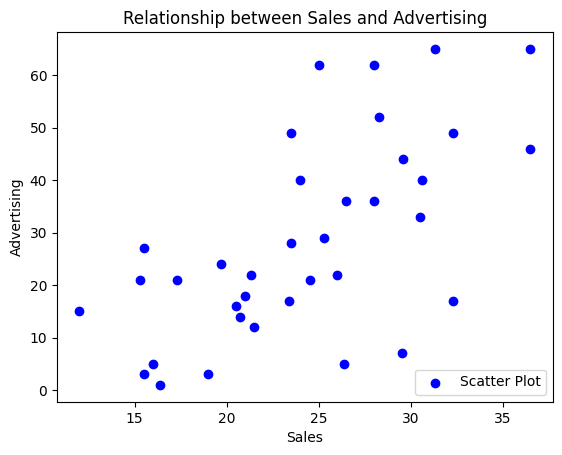

In [11]:
# Plot scatter plot between X and y
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

## Verificando as dimensões de X e y

Precisamos verificar as dimensões de `X` e `y` para ter certeza de que estão no formato correto para a API Scikit-Learn.

É um importante precursor da construção de modelos.


In [12]:
# Imprimir as dimensões de X e y
print(X.shape)
print(y.shape)

(36,)
(36,)


## Reshaping X and y

Como estamos trabalhando com apenas uma variável `feature`, precisamos remodelá-la usando o método do
Numpy chamado `reshape()`.

Este método está sendo usado para alterar a forma (i.e. _shape_) dos arrays unidimensionais `X` e `y`. O argumento -1 em uma dimensão do reshape indica que o tamanho dessa dimensão deve ser inferido automaticamente com base no tamanho total do array e nas outras dimensões.

O mesmo processo é aplicado a `y`. Ela também era um array unidimensional e, após o reshape, torna-se um array bidimensional com uma coluna.

Tanto `X` como `y` inicialmente são arrays unidimensionais, e após o `reshape`, elas se tornam arrays bidimensionais com **uma** coluna. Isso é frequentemente necessário quando você está trabalhando com algoritmos que esperam que os dados de entrada tenham duas dimensões, como é o caso de muitos modelos de **(ML)** que usam bibliotecas como **scikit-learn**.

Ou seja, os comandos abaixo estão preparando os dados para serem utilizados em um modelo de **ML** que espera que as `features` (`X`) e os `rótulos/targets` (`y`) tenham uma estrutura bidimensional.

In [13]:
# Reshape X e y
X = X.reshape(-1,1)
y = y.reshape(-1,1)


In [14]:
# Imprimir as dimensões de X e y após "reshaping"
print(X.shape)
print(y.shape)


(36, 1)
(36, 1)


In [15]:
print(X)

[[12. ]
 [20.5]
 [21. ]
 [15.5]
 [15.3]
 [23.5]
 [24.5]
 [21.3]
 [23.5]
 [28. ]
 [24. ]
 [15.5]
 [17.3]
 [25.3]
 [25. ]
 [36.5]
 [36.5]
 [29.6]
 [30.5]
 [28. ]
 [26. ]
 [21.5]
 [19.7]
 [19. ]
 [16. ]
 [20.7]
 [26.5]
 [30.6]
 [32.3]
 [29.5]
 [28.3]
 [31.3]
 [32.3]
 [26.4]
 [23.4]
 [16.4]]


In [16]:
print(y)

[[15.]
 [16.]
 [18.]
 [27.]
 [21.]
 [49.]
 [21.]
 [22.]
 [28.]
 [36.]
 [40.]
 [ 3.]
 [21.]
 [29.]
 [62.]
 [65.]
 [46.]
 [44.]
 [33.]
 [62.]
 [22.]
 [12.]
 [24.]
 [ 3.]
 [ 5.]
 [14.]
 [36.]
 [40.]
 [49.]
 [ 7.]
 [52.]
 [65.]
 [17.]
 [ 5.]
 [17.]
 [ 1.]]


## Divisão dos dados para teste e treinamento

Eu divido o conjunto de dados em dois conjuntos, a saber: conjunto de treinamento (_train set_) e conjunto de teste (_test set_).

O modelo aprende os relacionamentos dos dados de treinamento e prevê os dados de teste.



In [17]:
# Divide X e y em conjuntos de dados de treinamento e teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
# Imprime as dimensões de X_train,X_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(12, 1)
(12, 1)


## Mecânica do modelo

Divido o conjunto de dados em dois conjuntos – o conjunto de treinamento e o conjunto de teste. Em seguida, instanciamos o regressor `lm` e o ajustamos ao conjunto de treinamento com o método `fit`.

Nesta etapa, o modelo aprendeu as relações entre os dados de treinamento (`X_train`, `y_train`).

Agora o modelo está pronto para fazer previsões nos dados de teste (X_test). Portanto, prevejo os dados de teste usando o método de previsão.



In [19]:
# Ajusta (Fit) o modelo linear

# Instancie o objeto de regressão linear lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Treina o modelo usando os conjuentos de treinamento
lm.fit(X_train,y_train)


# Prevê com base nos dados de teste
y_pred=lm.predict(X_test)

## Valores da inclinação (_slope_) e interseção do modelo

O valor da inclinação é dado por `lm.coef_` ($m$) e o da interseção é dado por `lm.intercept_` ($b$)

A equação genérica da reta é:

$$\hat{y} = m * x + b$$

Os valores estimados são:

* `lm_coef_` = `m` = 1.60509347
* `lm.intercept_` = `b`= -11.16003616

Então, a equação da linha de regressão ajustada é:

$$\hat{y} = 1.60509347 * x - 11.16003616$$  

In [20]:
# Calcula o 'slope' e 'intercept' do modelo
m = lm.coef_
b = lm.intercept_,
print("Estimated model slope, m:" , m)
print("Estimated model intercept, b:" , b)


Estimated model slope, m: [[1.60509347]]
Estimated model intercept, b: (array([-11.16003616]),)


## Fazendo predições

Eu previ os valores de publicidade (`Advertising`) nos primeiros cinco conjuntos de dados de vendas (`Sales`) escrevendo código:

```
lm.predict(X) [0:5]  
```        

Se eu remover [0:5], obterei os valores de publicidade previstos para todo o conjunto de dados de vendas.

Para fazer previsões, sobre um valor de vendas individual, escrevo:

```
lm.predict(Xi)
```        

onde `Xi` é o valor dos dados de vendas da i-ésima observação.


In [21]:
# Prevendo os valores de "Advertising"
# Previsão de valores de publicidade nos primeiros cinco valores de vendas
lm.predict(X)[0:5]

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

In [22]:
# Para fazer uma previsão individual usando o modelo de regressão linear.
print(lm.predict([[24]]))

[[27.36220717]]


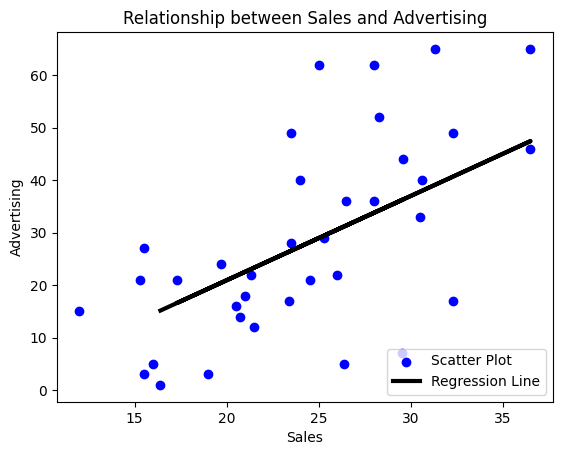

In [23]:
# Plotar a Linha de Regressão
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

## Referências


Os conceitos e ideias deste projeto foram retirados dos seguintes sites e livros:

i.	Machine learning notes by Andrew Ng

ii.	https://en.wikipedia.org/wiki/Linear_regression

iii.https://en.wikipedia.org/wiki/Simple_linear_regression

iv.	https://en.wikipedia.org/wiki/Ordinary_least_squares

v.	https://en.wikipedia.org/wiki/Root-mean-square_deviation

vi.	https://en.wikipedia.org/wiki/Coefficient_of_determination

vii.https://www.statisticssolutions.com/assumptions-of-linear-regression/

viii.Python Data Science Handbook by Jake VanderPlas

ix.	Hands-On Machine Learning with Scikit Learn and Tensorflow by Aurilien Geron

x.	Introduction to Machine Learning with Python by Andreas C Muller and Sarah Guido
